In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
S0 = 100.0              # spot stock price
K = 100.0               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sig = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [7]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [8]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [9]:
S

array([[100.        , 112.24009024, 125.97837858, 141.39824581],
       [  0.        ,  89.09472523, 100.        , 112.24009024],
       [  0.        ,   0.        ,  79.37870064,  89.09472523],
       [  0.        ,   0.        ,   0.        ,  70.72223522]])

In [10]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6176090164403981

In [11]:
S_T = S[:,-1]
S_T

array([141.39824581, 112.24009024,  89.09472523,  70.72223522])

In [12]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [15]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 4.15461967,  1.49175992,  0.        ,  0.        ],
       [ 0.        ,  8.82373471,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 17.34290941, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [17]:
print('European ' + payoff, str( V[0,0]))

European put 4.154619665678642


In [18]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 4.92448707,  1.49175992,  0.        ,  0.        ],
       [ 0.        , 10.90527477,  4.0333673 ,  0.        ],
       [ 0.        ,  0.        , 20.62129936, 10.90527477],
       [ 0.        ,  0.        ,  0.        , 29.27776478]])

In [19]:
print('American ' + payoff, str( V[0,0]))

American put 4.924487073316837


In [20]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [21]:
T = 1
r = 0.1
sigma = 0.2
S0 = 100
K = 100

In [22]:
S = mcs_simulation_np(1000)

In [23]:
S = np.transpose(S)
S

array([[100.        ,  99.8312447 , 100.45556777, ...,  80.45326291,
         80.85475405,  81.29015041],
       [100.        , 100.30854448,  99.9248653 , ..., 116.84832199,
        117.40952049, 117.09342343],
       [100.        ,  99.63310289,  99.10070672, ..., 117.59722   ,
        117.53784642, 117.53985114],
       ...,
       [100.        , 100.46063414, 101.01361036, ...,  97.16199567,
         96.65081311,  96.28181633],
       [100.        ,  99.56980568, 100.54810408, ..., 142.43719901,
        142.1472642 , 140.62050654],
       [100.        ,  99.67363961, 100.66774686, ..., 118.7340321 ,
        119.25312369, 119.67353656]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

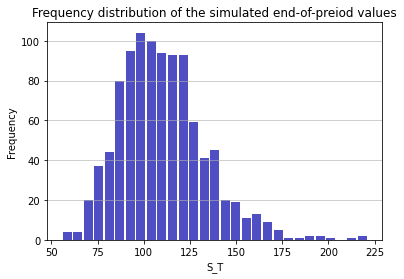

In [24]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [25]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 4.440938000759562


In [26]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 14.640442745114273
